In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [10]:
train_data = np.loadtxt("./data/zip.train")
test_data = np.loadtxt("./data/zip.test")

In [11]:
x_train, x_test, y_train, y_test = train_data[:,1:], test_data[:, 1:], train_data[:,0], test_data[:,0]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7291, 256) (2007, 256) (7291,) (2007,)


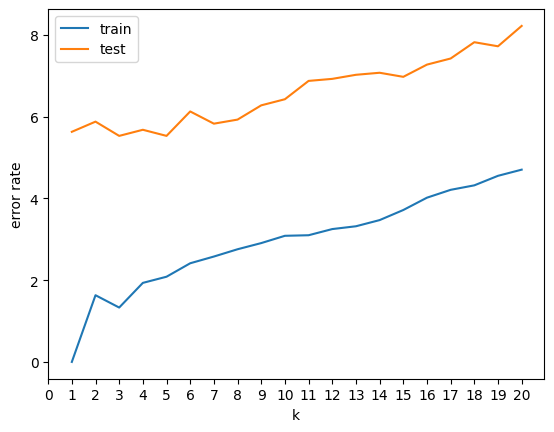

In [12]:
train_error, test_error = [], []
K = 21

for k in range(1, K):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

    train_error.append(100 - knn.score(x_train, y_train)*100)
    test_error.append(100 - knn.score(x_test, y_test)*100)
    
x = np.arange(1,K)

fig, ax = plt.subplots()

ax.plot(x, train_error, label="train")
ax.plot(x, test_error, label="test")

ax.set_xlabel('k')
ax.set_ylabel('error rate (%)')

ax.set_xticks(np.arange(0, K, 1))
ax.legend()

plt.show()

In [5]:
train_data = train_data[np.isin(train_data[:,0], [2,3])]
test_data = test_data[np.isin(test_data[:,0], [2,3])]

In [6]:
x_train, x_test, y_train, y_test = train_data[:,1:], test_data[:, 1:], train_data[:,0], test_data[:,0]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1389, 256) (364, 256) (1389,) (364,)


In [7]:
model = LinearRegression()
model.fit(x_train, y_train)

predict_train = model.predict(x_train) < 2.5
predict_test = model.predict(x_test) < 2.5

y_train_bool = y_train < 2.5
y_test_bool = y_test < 2.5

train_error = np.mean(predict_train != y_train_bool) * 100
test_error = np.mean(predict_test != y_test_bool) * 100

print(train_error)
print(test_error)

0.5759539236861051
4.1208791208791204
